In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
file_path = r'G:\Data Projects\nyc-gov-time-series\city-of-ny-d5zb-ragj\city-of-ny-d5zb-ragj\data\nyc_gov_web_analytics_1.csv'
df = pd.read_csv(file_path)

print(df.head())

  time_period                                               page  \
0      Jul-15                                                NaN   
1      Jul-15                               http://www1.nyc.gov/   
2      Jul-15  http://www1.nyc.gov/site/finance/pay-now/onlin...   
3      Jul-15  http://www1.nyc.gov/assets/finance/jump/pay_pa...   
4      Jul-15   http://www.nyc.gov/html/dob/html/home/home.shtml   

                                      title    visits     views  \
0                                       NaN       NaN  23123911   
1     Welcome to NYC.gov | City of New York  551941.0    715124   
2                            Pay Online Now  470528.0    903463   
3  Pay Parking and Camera Violations Online  361846.0    548096   
4                   Department of Buildings  321598.0    589963   

   average_time_viewed_seconds  
0                        96.50  
1                        68.02  
2                        41.90  
3                       313.00  
4                      

In [3]:
df.columns

Index(['time_period', 'page', 'title', 'visits', 'views',
       'average_time_viewed_seconds'],
      dtype='object')

In [5]:
df['time_period'] = pd.to_datetime(df['time_period'], format='%b-%y', errors='coerce')
df.set_index('time_period', inplace=True)
print(df.head())

                                                          page  \
time_period                                                      
2015-07-01                                                 NaN   
2015-07-01                                http://www1.nyc.gov/   
2015-07-01   http://www1.nyc.gov/site/finance/pay-now/onlin...   
2015-07-01   http://www1.nyc.gov/assets/finance/jump/pay_pa...   
2015-07-01    http://www.nyc.gov/html/dob/html/home/home.shtml   

                                                title    visits     views  \
time_period                                                                 
2015-07-01                                        NaN       NaN  23123911   
2015-07-01      Welcome to NYC.gov | City of New York  551941.0    715124   
2015-07-01                             Pay Online Now  470528.0    903463   
2015-07-01   Pay Parking and Camera Violations Online  361846.0    548096   
2015-07-01                    Department of Buildings  321598.0    589963  

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32016 entries, 2015-07-01 to 2016-10-01
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   page                         31878 non-null  object 
 1   title                        30579 non-null  object 
 2   visits                       32000 non-null  float64
 3   views                        32016 non-null  int64  
 4   average_time_viewed_seconds  31053 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ MB
None


In [9]:
print(df.describe())

             visits         views  average_time_viewed_seconds
count  3.200000e+04  3.201600e+04                 31053.000000
mean   3.725216e+03  1.206588e+04                   139.742245
std    2.425809e+04  3.620205e+05                   134.775296
min    3.000000e+00  3.000000e+00                     0.000000
25%    1.500000e+01  1.700000e+01                    54.710000
50%    7.620000e+02  9.770000e+02                   104.930000
75%    1.875000e+03  2.618000e+03                   179.160000
max    2.226321e+06  2.477252e+07                  2130.000000


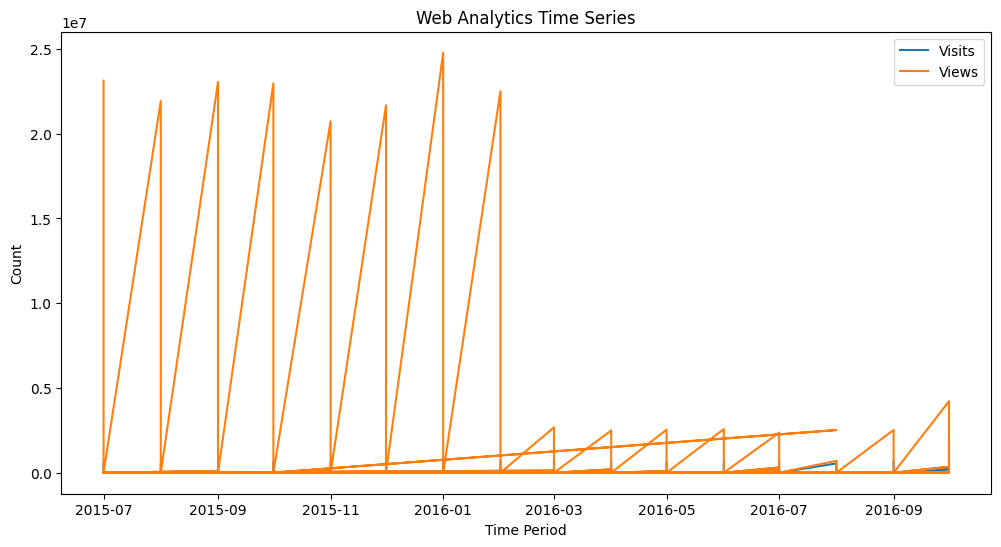

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['visits'], label='Visits')
plt.plot(df.index, df['views'], label='Views')
plt.title('Web Analytics Time Series')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.legend()
plt.show()

In [38]:
# Assuming 'time_period' is the column with timestamp data


# Drop rows with missing values and duplicates
df_cleaned = df_cleaned.dropna().drop_duplicates()

# Convert 'visits' and 'views' columns to numeric
df_cleaned['visits'] = pd.to_numeric(df_cleaned['visits'], errors='coerce')
df_cleaned['views'] = pd.to_numeric(df_cleaned['views'], errors='coerce')

# Handling Outliers
threshold = 1000
df_cleaned = df_cleaned[df_cleaned['visits'] <= threshold]

# Set 'time_period' as the index
df_cleaned.set_index('time_period', inplace=True)

# Display the cleaned DataFrame
print(df_cleaned.head())


KeyError: "None of ['time_period'] are in the columns"

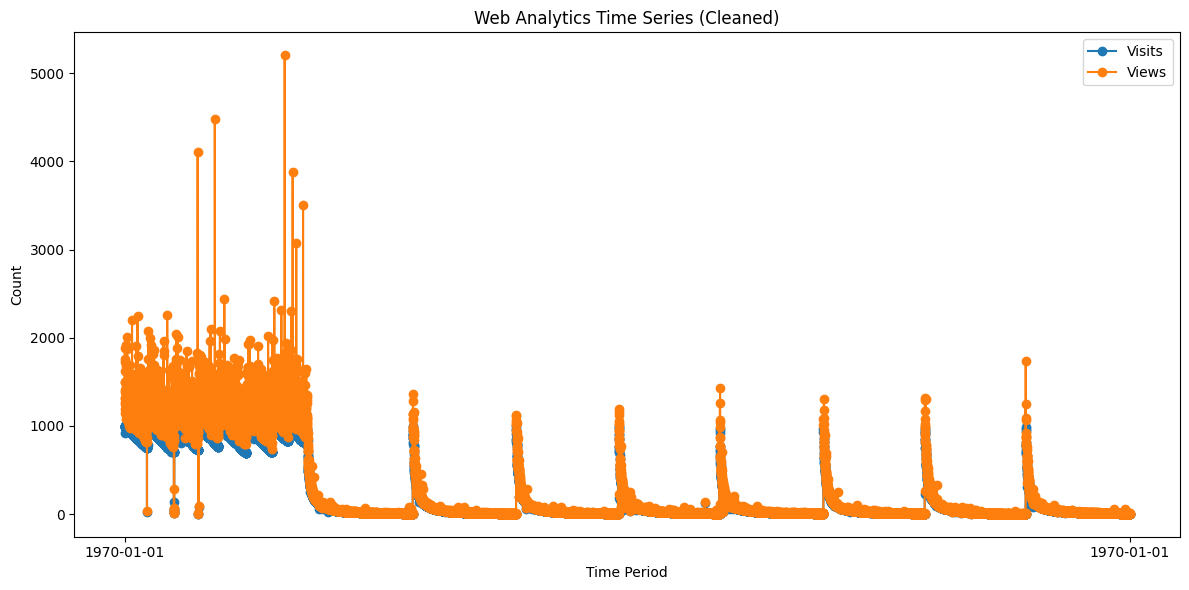

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned['visits'], label='Visits', marker='o')
plt.plot(df_cleaned.index, df_cleaned['views'], label='Views', marker='o')
plt.title('Web Analytics Time Series (Cleaned)')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.legend()


plt.xticks([df_cleaned.index[0], df_cleaned.index[-1]], [df_cleaned.index[0].strftime('%Y-%m-%d'), df_cleaned.index[-1].strftime('%Y-%m-%d')])

plt.tight_layout()
plt.show()

In [35]:
df_cleaned.index[-1]

Timestamp('1970-01-01 00:00:00.000016248')

In [ ]:
I guess the 